In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [2]:
df = pd.read_csv('Heart Disease Dataset UCI.csv')
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [3]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [4]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
for i in range(0, len(df.columns)):
    print(df[df.columns[i]].value_counts())
    print('************************************************\n')

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64
************************************************

Male      713
Female    312
Name: sex, dtype: int64
************************************************

Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: chest_pain_type, dtype: int64
************************************************

120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      

In [6]:
'''gen = {'Female':0, 'Male':1}
yes_no = {'No':0, 'Yes':1}
chest_pain = {'Typical angina':0, 'Non-anginal pain':1, 'Atypical angina':2, 'Asymptomatic':3}
fasting_blood = {'Lower than 120 mg/ml':0, 'Greater than 120 mg/ml':1}
rest = {'ST-T wave abnormality':0, 'Normal':1, 'Left ventricular hypertrophy':2}
slop = {'Flat':0, 'Downsloping':1, 'Upsloping':2}
vessels = {'Zero':0, 'One':1, 'Two':2, 'Three':3, 'Four':4}
thalassemia = {'Fixed Defect':0, 'Reversable Defect':1, 'Normal':2, 'No':3}'''

"gen = {'Female':0, 'Male':1}\nyes_no = {'No':0, 'Yes':1}\nchest_pain = {'Typical angina':0, 'Non-anginal pain':1, 'Atypical angina':2, 'Asymptomatic':3}\nfasting_blood = {'Lower than 120 mg/ml':0, 'Greater than 120 mg/ml':1}\nrest = {'ST-T wave abnormality':0, 'Normal':1, 'Left ventricular hypertrophy':2}\nslop = {'Flat':0, 'Downsloping':1, 'Upsloping':2}\nvessels = {'Zero':0, 'One':1, 'Two':2, 'Three':3, 'Four':4}\nthalassemia = {'Fixed Defect':0, 'Reversable Defect':1, 'Normal':2, 'No':3}"

In [7]:
'''df['sex'] = df['sex'].replace(gen)
df['chest_pain_type'] = df['chest_pain_type'].replace(chest_pain)
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace(fasting_blood)
df['rest_ecg'] = df['rest_ecg'].replace(rest)
df['exercise_induced_angina'] = df['exercise_induced_angina'].replace(yes_no)
df['slope'] = df['slope'].replace(slop)
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(vessels)
df['thalassemia'] = df['thalassemia'].replace(thalassemia)'''

"df['sex'] = df['sex'].replace(gen)\ndf['chest_pain_type'] = df['chest_pain_type'].replace(chest_pain)\ndf['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace(fasting_blood)\ndf['rest_ecg'] = df['rest_ecg'].replace(rest)\ndf['exercise_induced_angina'] = df['exercise_induced_angina'].replace(yes_no)\ndf['slope'] = df['slope'].replace(slop)\ndf['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].replace(vessels)\ndf['thalassemia'] = df['thalassemia'].replace(thalassemia)"

In [8]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [9]:
df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [19]:
'''labelEncoder = preprocessing.LabelEncoder()
category_col = df.select_dtypes(include=['object']).columns
mapping_dict = {}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_,
                               labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col] = le_name_mapping'''
categoricals = []
for col, col_type in df.dtypes.iteritems():
     if col_type == 'O':
        categoricals.append(col)
     else:
        df[col].fillna(0, inplace=True)

In [22]:
df_ohe = pd.get_dummies(df, columns=categoricals, dummy_na=True)
df_ohe

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Female,sex_Male,sex_nan,chest_pain_type_Asymptomatic,...,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,vessels_colored_by_flourosopy_nan,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,thalassemia_nan
0,52,125,212,168,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,53,140,203,155,3.1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,70,145,174,125,2.6,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,61,148,203,161,0.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,62,138,294,106,1.9,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1021,60,125,258,141,2.8,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1022,47,110,275,118,1.0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1023,50,110,254,159,0.0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [23]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

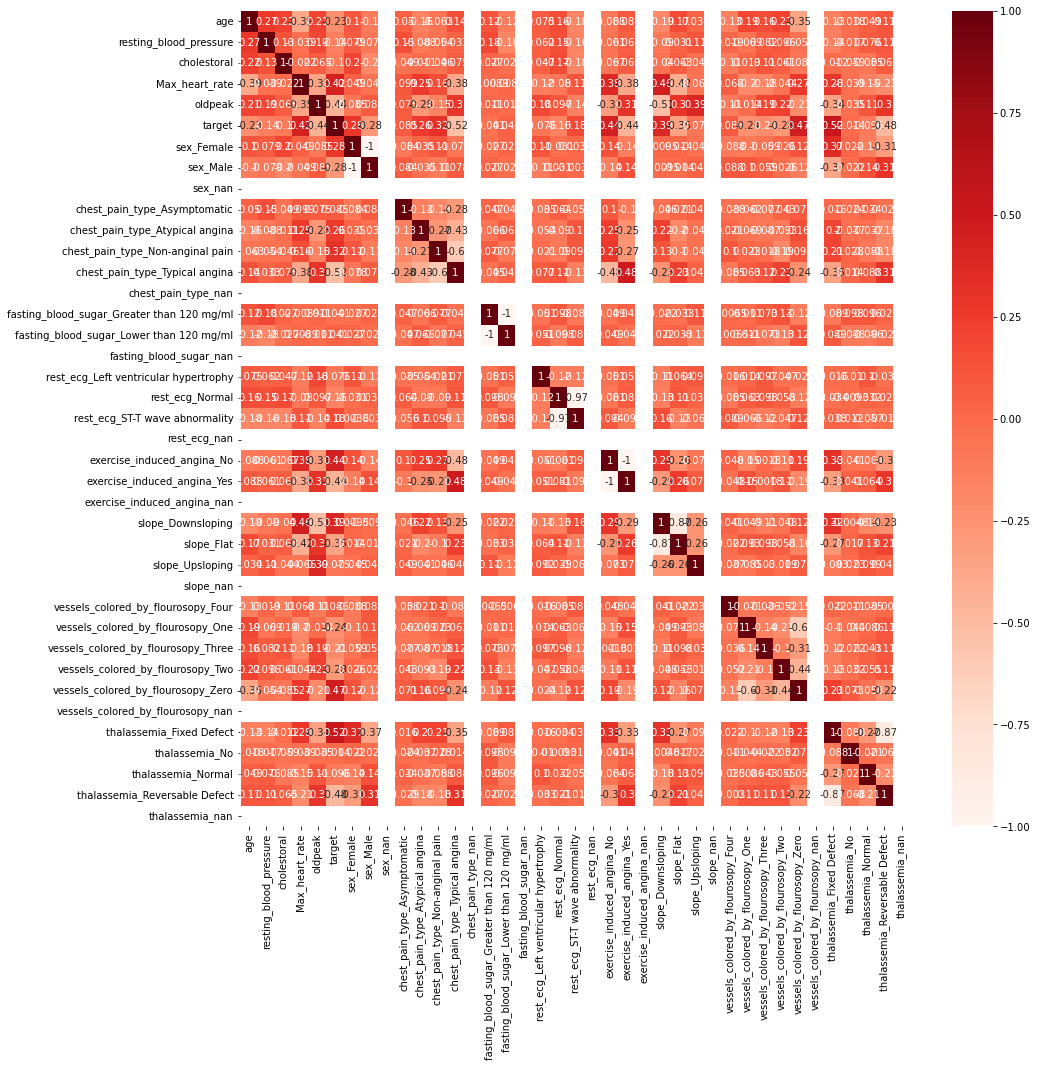

In [24]:
plt.figure(figsize=(15,15))
cor = df_ohe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

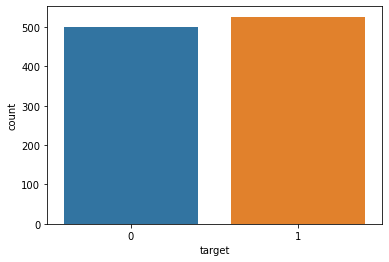

In [25]:
sns.countplot(x=df_ohe['target'])

In [26]:
X = df_ohe.drop(columns='target')
y = df_ohe['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, shuffle =True)

In [30]:
GBCModel = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.8, random_state=0)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  1.0


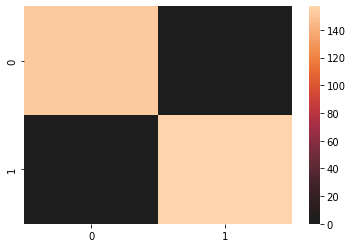

Confusion Matrix is
 [[151   0]
 [  0 157]]


In [31]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [32]:
y_pred = GBCModel.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       157

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

1.0


In [33]:
from joblib import Parallel, delayed
import joblib

joblib.dump(GBCModel, 'new_heart_disease_model.pkl')

['new_heart_disease_model.pkl']

In [56]:
#X = df[df.columns.difference(['target'])]

In [35]:
model_columns = list(X.columns)
model_columns

['age',
 'resting_blood_pressure',
 'cholestoral',
 'Max_heart_rate',
 'oldpeak',
 'sex_Female',
 'sex_Male',
 'sex_nan',
 'chest_pain_type_Asymptomatic',
 'chest_pain_type_Atypical angina',
 'chest_pain_type_Non-anginal pain',
 'chest_pain_type_Typical angina',
 'chest_pain_type_nan',
 'fasting_blood_sugar_Greater than 120 mg/ml',
 'fasting_blood_sugar_Lower than 120 mg/ml',
 'fasting_blood_sugar_nan',
 'rest_ecg_Left ventricular hypertrophy',
 'rest_ecg_Normal',
 'rest_ecg_ST-T wave abnormality',
 'rest_ecg_nan',
 'exercise_induced_angina_No',
 'exercise_induced_angina_Yes',
 'exercise_induced_angina_nan',
 'slope_Downsloping',
 'slope_Flat',
 'slope_Upsloping',
 'slope_nan',
 'vessels_colored_by_flourosopy_Four',
 'vessels_colored_by_flourosopy_One',
 'vessels_colored_by_flourosopy_Three',
 'vessels_colored_by_flourosopy_Two',
 'vessels_colored_by_flourosopy_Zero',
 'vessels_colored_by_flourosopy_nan',
 'thalassemia_Fixed Defect',
 'thalassemia_No',
 'thalassemia_Normal',
 'thalasse

In [36]:
# Load the model that you just saved
GBCModel = joblib.load('heart_disease_model.pkl')

# Saving the data columns from training
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_heart_columns.pkl')
print("Models columns dumped!")

Models columns dumped!
